In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

In [3]:
df.shape

(101766, 50)

### Initial Data Analysis -- Nulls, Data Type

In [4]:
### Commenting this out. Uncomment it if you want to see a sample of data ###
# df.head(5)

In [5]:
### Commenting this out. Uncomment it if you want to see column ###
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

There are two metabolic measures, 'max_glu_serum' and 'A1Cresult'.
There are also 23 drugs in the data set, from 'metaformin' to 'metformin-pioglitazone'.
We will look at null values and data types for the columns. 

In [6]:
df.duplicated(subset=['patient_nbr']).sum()

30248

Though there are patients with multiple hospital admissions, 'patient_nbr' dupes, these are separate incidences and will be considered in the analysis.

In [7]:
### Commenting this out. Uncomment it if you want to see if there are NULL values ###
# df.isnull().sum()

In [8]:
### Commenting this out. Uncomment it if you want to see the data type for each column ###
# df.dtypes

Though there are no NULL values, we examine the data values below.

In [9]:
### Commenting this out. Uncomment it if you want to see a sample of data ###

for col in df.columns[3:len(df['encounter_id'])]:
    print(df[col].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: 

The data set does not contain any null value.  However, it includes "?", "None" and "No".  We look at the share of these values in the columns.

In [10]:
### Counting the share of NULL, missing data and "No".  
### "No" implies the patient not recieving the treatment in case of drugs.

### Initializing a list ###
df_null = []

### Counting the number of 'NULL', '?', 'None' and 'No' for each column. ###

for column in df.columns:
    df_null.append([column, df[column].isnull().sum()/len(df[column]), 
                    df[column].isin(['?']).sum()/len(df[column]),
                    df[column].isin(['None']).sum()/len(df[column]),
                    df[column].isin(['No']).sum()/len(df[column])
                   ]) 

### Creating a data frame
df_null = pd.DataFrame(df_null)

### Renaming columns
df_null.rename (columns= {0: 'Variable', 1: 'NULL', 2: '?', 3: 'None', 4: 'No'}, inplace= True) 

df_null

,Variable,NULL,?,None,No
0,encounter_id,0.0,0.000000,0.000000,0.000000
1,patient_nbr,0.0,0.000000,0.000000,0.000000
2,race,0.0,0.022336,0.000000,0.000000
3,gender,0.0,0.000000,0.000000,0.000000
4,age,0.0,0.000000,0.000000,0.000000
5,weight,0.0,0.968585,0.000000,0.000000
6,admission_type_id,0.0,0.000000,0.000000,0.000000
7,discharge_disposition_id,0.0,0.000000,0.000000,0.000000
8,admission_source_id,0.0,0.000000,0.000000,0.000000
9,time_in_hospital,0.0,0.000000,0.000000,0.000000


#### Observations on ?, None and No

1. '?' Value: 
 - Dropped: 97% of weight, 40% of Medical Speciality and 49% of Payer Code have ? value, which strongly indicates missing value.  These three variables will be dropped.
 - Impute: 2% of the data have missing gender value and shall be imputed.
 - Diagnosis -- 0.02% of data have missing diag_1 code and we shall assume a value of zero. diag_2 and diag_3 have missing values with missing diag_3 > missing diag_2 > missing diag_1 .  This implies that patients can have less than 3 diagnoses.

2. "None" Value:max_glu_serum and A1Cresult have 95% and 83% 'None' values.  Other values for this data are ("Norm", ">200", ">300") and "Norm", ">7", ">8").  These two variables are important metabolic measures and further investigation is required.

3. "No" Value: All "No" values are for medication and implies that the subject has not been given that medication.


In [11]:
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

The 'change' flag indicates if the medication dosage or the drug has been changed and is denoted by 'Ch'.

#### Drugs Administered -- Countnig Change -- "Up", "Steady", "Down"
Most patients are on insulin (54%).  Other than 20% on metamorfin and 12.5% on glipizide and 10.5% on glyburide, the usage of the other drugs are very low.
We create three new columns to capture the count of 'Up', 'Steady' and 'Down' for the 23 drugs in the data set for each row. These are the indicators of performace of the drug administered.

In [12]:

drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']



for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Up')
    df['Up'] = count

for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Steady')
    df['Steady'] = count

for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Down')
    df['Down'] = count


##### Create summary table of 'Up', 'Steady' and 'Down' of the 23 drugs.

In [13]:
### Creating a list of drugs ###

features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 
            'examide', 'citoglipton', 'insulin','glyburide-metformin', 
            'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone' ]

### Initialize a list ###
drug = []

### Countng the number of 'Down', 'Steady', 'Up' and 'No' for each feature in features list ###

for feature in features:

    drug.append([feature, df[df[feature]== 'Down'].shape[0], df[df[feature]== 'Steady'].shape[0], 
                df[df[feature]== 'Up'].shape[0],df[df[feature]== 'No'].shape[0], df.shape[0], 
                 df[df[feature]== 'No'].shape[0]/df.shape[0]])
    
### Converting to a data frame ###   
drug = pd.DataFrame(drug)

drug.sort_values(by=1, axis=0, ascending=False, inplace=True)

### Renaming column headers
drug.rename (columns= {0: 'drug_name', 1: 'Down', 2: 'Steady', 3: 'Up', 4: 'No', 5: 'Total', 6: '%age_No'}, inplace= True) 

### Output all ##
drug.head(25)

,drug_name,Down,Steady,Up,No,Total,%age_No
17,insulin,12218,30849,11316,47383,101766,0.465607
0,metformin,575,18346,1067,81778,101766,0.803589
7,glyburide,564,9274,812,91116,101766,0.895348
6,glipizide,560,11356,770,89080,101766,0.875341
4,glimepiride,194,4670,327,96575,101766,0.948991
9,pioglitazone,118,6976,234,94438,101766,0.927992
10,rosiglitazone,87,6100,178,95401,101766,0.937455
1,repaglinide,45,1384,110,100227,101766,0.984877
2,nateglinide,11,668,24,101063,101766,0.993092
18,glyburide-metformin,6,692,8,101060,101766,0.993063


##### Rollng up all drugs that are administered to less than 1,000 to 'Others'.
Keeing  Top 8 drugs  administered to 1,000+ individuals.  ['insulin','metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide','pioglitazone', 'rosiglitazone'].  

#### "diagnosis_count"
User created value counts of diag_1, diag_2 and diag_3
Creating a column that counts the no of diagnosis identified for an individual.

In [14]:
### Counting the number of disgnosis for each row and storing in a new column, 'diagnosis_count'
isY = lambda x:int(x!='?')
countDiagnosis = lambda row: isY(row['diag_1']) + isY(row['diag_2']) + isY(row['diag_3'])
df['diagnosis_count'] = df.apply(countDiagnosis,axis=1)

df['diagnosis_count'].value_counts()

3    100244
2      1243
1       278
0         1
Name: diagnosis_count, dtype: int64

Converting drug outcome to numeric.

In [15]:
### Creating a list of drugs ###

features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 
            'examide', 'citoglipton', 'insulin','glyburide-metformin', 
            'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone' ]


# drugs_to_keep = ['insulin','metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide','pioglitazone', 'rosiglitazone']

### creating a map dictonary ###

drug_outcome_map = {'No':0, 'Up':1, 'Steady':2, 'Down':3}


for drug in features:
        df[drug] = df[drug].map(drug_outcome_map)


Converting drugs outcomes of the ones to consolidate to 'drug_others' to numeric and storing the max value.

In [16]:
drugs_to_drop = ['nateglinide', 'glyburide-metformin','acarbose', 'miglitol', 'tolbutamide', 'chlorpropamide',         
                 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'acetohexamide', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']


df['diabetes_med_others'] = df[drugs_to_drop].max(axis=1)


####  The following variables have large tail of values that we will roll up.

| Column Name           | Values |       |
|-----------------------|--------|-------|
|                       | Top 10 | Top 5 |
| Admission Type        | 99.7%  | 89.8% |
| Discharge Disposition | 91.3%  | 85.6% |
| Admission Source      | 97.6%  | 92.2% |

In [17]:
### Classifying admission coirce ID into 5 categories 0: Uknowns, 1: Physician Referral, 
###2: Clinic/HMO/Home Care Referral 30: Care facility referrals e.g. hospitals; 40: New borns & Babies

df['admission_source_id'] =['0' if x in (15,17,20,9,21,28,16,27,26) else x for x in df['admission_source_id']]

df['admission_source_id'] =['2' if x in (2,3,18,19) else x for x in df['admission_source_id']]

df['admission_source_id'] =['30' if x in (4,5,6,25,7,10,22,8) else x for x in df['admission_source_id']]

df['admission_source_id'] =['40' if x in (23,24,11,12,13,14) else x for x in df['admission_source_id']]

df['admission_source_id'] =['1' if x in (1,99) else x for x in df['admission_source_id']]



In [18]:
### Preserving Top 3, unknows, n./a, NULL in 0 ###
###Trauma or new brons are small dso grouped in 0 ####

df['admission_type_id'] =['0' if x in (4, 5,6,7,8) else x for x in df['admission_type_id']]

df['admission_type_id'] =['1' if x in (1,10) else x for x in df['admission_type_id']]

df['admission_type_id'] =['2' if x in (2,11) else x for x in df['admission_type_id']]

df['admission_type_id'] =['3' if x in (3,12) else x for x in df['admission_type_id']]


##### Rolling up diagnosis codes to Top 10
There are 700+ diagnosis codes for each of the three diagnosis codes.  Only the Top 10 are retained and its share of capturing the diagnosis is shown below.

| Column Name | Share of Top 10 Codes |
|-------------|-----------------------|
| Diag_1      | 35%                   |
| Diag_2      | 42%                   |
| Diag_3      | 45%                   |


In [19]:
df['diag1'] = df['diag_1']
df['diag2'] = df['diag_2']
df['diag3'] = df['diag_3']
df.loc[df['diag_1'].str.contains('V'), ['diag1']] =0
df.loc[df['diag_2'].str.contains('V'), ['diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['diag3']] = 0
df.loc[df['diag_1'].str.contains('E'), ['diag1']] =1
df.loc[df['diag_2'].str.contains('E'), ['diag2']] = 1
df.loc[df['diag_3'].str.contains('E'), ['diag3']] = 1

df['diag1'] = df['diag1'].replace('?', -1)
df['diag2'] = df['diag2'].replace('?', -1)
df['diag3'] = df['diag3'].replace('?', -1)

In [20]:
df['diag1'] = df['diag1'].astype(float)
df['diag2'] = df['diag2'].astype(float)
df['diag3'] = df['diag3'].astype(float)

In [21]:
for index, row in df.iterrows():
    if (row['diag1'] >= 390 and row['diag1'] < 460) or (row['diag1'] == 785):
        df.loc[index, 'diag_1'] = 'Circulatory'
    elif (row['diag1'] >= 460 and row['diag1'] < 520) or (row['diag1'] == 786):
        df.loc[index, 'diag_1'] = 'Respiratory'
    elif (row['diag1'] >= 520 and row['diag1'] < 580) or (row['diag1'] == 787):
        df.loc[index, 'diag_1'] = 'Digestive'
    elif (row['diag1'] == 250):
        df.loc[index, 'diag_1'] = 'Diabetes'
    elif (row['diag1'] >= 800 and row['diag1'] < 1000):
        df.loc[index, 'diag_1'] = 'Injury'
    elif (row['diag1'] >= 710 and row['diag1'] < 740):
        df.loc[index, 'diag_1'] = 'Musculoskeletal'
    elif (row['diag1'] >= 580 and row['diag1'] < 630) or (row['diag1'] == 788):
        df.loc[index, 'diag_1'] = 'Genitourinary'
    elif (row['diag1'] >= 140 and row['diag1'] < 240):
        df.loc[index, 'diag_1'] = 'Neoplasm'
    else:
        df.loc[index, 'diag_1'] = 'Others'

In [22]:
for index, row in df.iterrows():
    if (row['diag2'] >= 390 and row['diag2'] < 460) or (row['diag2'] == 785):
        df.loc[index, 'diag_2'] = 'Circulatory'
    elif (row['diag2'] >= 460 and row['diag2'] < 520) or (row['diag2'] == 786):
        df.loc[index, 'diag_2'] = 'Respiratory'
    elif (row['diag2'] >= 520 and row['diag2'] < 580) or (row['diag2'] == 787):
        df.loc[index, 'diag_2'] = 'Digestive'
    elif (row['diag2'] == 250):
        df.loc[index, 'diag_2'] = 'Diabetes'
    elif (row['diag2'] >= 800 and row['diag2'] < 1000):
        df.loc[index, 'diag_2'] = 'Injury'
    elif (row['diag2'] >= 710 and row['diag2'] < 740):
        df.loc[index, 'diag_2'] = 'Musculoskeletal'
    elif (row['diag2'] >= 580 and row['diag2'] < 630) or (row['diag2'] == 788):
        df.loc[index, 'diag_2'] = 'Genitourinary'
    elif (row['diag2'] >= 140 and row['diag2'] < 240):
        df.loc[index, 'diag_2'] = 'Neoplasm'
    else:
        df.loc[index, 'diag_2'] = 'Others'

In [23]:
for index, row in df.iterrows():
    if (row['diag3'] >= 390 and row['diag3'] < 460) or (row['diag3'] == 785):
        df.loc[index, 'diag_3'] = 'Circulatory'
    elif (row['diag3'] >= 460 and row['diag3'] < 520) or (row['diag3'] == 786):
        df.loc[index, 'diag_3'] = 'Respiratory'
    elif (row['diag3'] >= 520 and row['diag3'] < 580) or (row['diag3'] == 787):
        df.loc[index, 'diag_3'] = 'Digestive'
    elif (row['diag3'] == 250):
        df.loc[index, 'diag_3'] = 'Diabetes'
    elif (row['diag3'] >= 800 and row['diag3'] < 1000):
        df.loc[index, 'diag_3'] = 'Injury'
    elif (row['diag3'] >= 710 and row['diag3'] < 740):
        df.loc[index, 'diag_3'] = 'Musculoskeletal'
    elif (row['diag3'] >= 580 and row['diag3'] < 630) or (row['diag3'] == 788):
        df.loc[index, 'diag_3'] = 'Genitourinary'
    elif (row['diag3'] >= 140 and row['diag3'] < 240):
        df.loc[index, 'diag_3'] = 'Neoplasm'
    else:
        df.loc[index, 'diag_3'] = 'Others'

In [24]:
df[['diag_1', 'diag_2', 'diag_3']].sample(20)

,diag_1,diag_2,diag_3
12058,Others,Others,Respiratory
21986,Others,Others,Others
97669,Circulatory,Circulatory,Circulatory
39644,Circulatory,Respiratory,Others
58186,Circulatory,Others,Circulatory
14547,Digestive,Others,Digestive
83203,Circulatory,Others,Genitourinary
67610,Digestive,Diabetes,Circulatory
56611,Digestive,Digestive,Others
28521,Respiratory,Genitourinary,Others


### Dropping Variables

In [25]:
### Dropping columns with large amount of missing data

cols_to_drop = ['encounter_id', 'weight','payer_code', 'medical_specialty', 'max_glu_serum', \
                'diag1', 'diag2', 'diag3']

df = df.drop(columns = cols_to_drop)

In [26]:
df.shape

(101766, 50)

In [27]:
pd.crosstab(df['race'], df['gender'])

gender,Female,Male,Unknown/Invalid
race,,,
?,1133,1138,2
AfricanAmerican,11728,7482,0
Asian,318,323,0
Caucasian,39689,36410,0
Hispanic,1092,945,0
Other,748,757,1


#### Dropping rows with missing gender and race reduces the dataset by 2,274.

In [28]:
### Dropping rows with missing gender and missing race ###

df = df[df['gender'] != 'Unknown/Invalid']

df = df[df['race'] != '?']

df.shape

(99492, 50)

#### Dropping individuals who expired in hospital, transferred to hospice etc.

In [29]:
expired = [11,13,14,19, 20, 21]

for code in expired:
    df.drop(df[df['discharge_disposition_id'] == code].index, inplace = True) 
df['discharge_disposition_id'] = ['0' if x not in (1,2,3,6,18) else x for x in df['discharge_disposition_id']]

#### Dropping drugs administered to 1,000 or less individuals

In [30]:
drugs_to_drop = ['nateglinide', 'glyburide-metformin','acarbose', 'miglitol', 'tolbutamide', 'chlorpropamide',         
                    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'acetohexamide', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']       

### Dropping select drug columns
df = df.drop(columns = drugs_to_drop)


### Examining the prepared data set

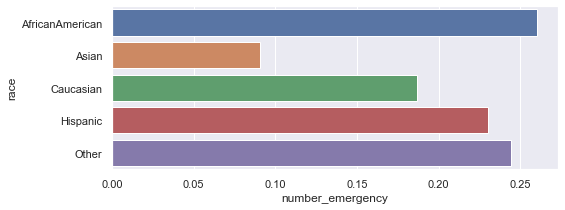

In [31]:
Emergency_Race = df.groupby(['race'], as_index=False)['number_emergency'].mean()
# daily_sum = bike.groupby(['dteday'], as_index=False)['count'].sim

plt.figure(figsize=(8, 3))
sns.set(style="darkgrid")
sns.barplot(x='number_emergency', y='race',  data=Emergency_Race, #hue = 'holiday',
              orient='h')


In [32]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted', 'Up',
       'Steady', 'Down', 'diagnosis_count', 'diabetes_med_others'],
      dtype='object')

In [33]:
df =pd.get_dummies(df, columns= ['race', 'gender', 'age', 'admission_type_id','discharge_disposition_id',
         'admission_source_id','change', 'diabetesMed' ], drop_first = True)
df =pd.get_dummies(df, columns= ['diag_1','diag_2','diag_3', 'A1Cresult'], drop_first = False)
df = df.drop(columns = 'A1Cresult_None')

In [34]:
df.shape

(97108, 81)

In [35]:
### Commenting this out. Uncomment it if you want to see a sample of data ###

for col in df.columns[3:len(df['patient_nbr'])]:
    print(df[col].value_counts())

0    44539
1    19846
2    12146
3     9033
6     4677
4     3971
5     2896
Name: num_procedures, dtype: int64
13    5821
12    5754
11    5567
15    5566
14    5467
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64
0     80992
1      8215
2      3459
3      1977
4      1061
5       506
6       290
7       154
8        96
9        82
10       57
11       40
13       30
12       29
14       28
15       20
16       13
17        8
21        6
20        6
22        5
18        5
19        3
24        3
27        3
23        2
26        2
29        2
33        2
35        2
36        2
40        1
25        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64
0     86093
1      7413
2      1969
3       703
4       369
5       190
6        93
7        72
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19       

In [36]:
df.to_csv('./input_file.csv', index=False)